In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
InputData = pd.read_csv("train.csv")

In [3]:
FinalTest = pd.read_csv("test.csv")


In [4]:
print(InputData.shape)
print(FinalTest.shape)

(69999, 172)
(30000, 171)


In [5]:
InputData.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
InputData.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [7]:
different_columns = set(InputData.columns) - set(FinalTest.columns)

# Print the names of columns present in X_train but not in FinalTest
print("Columns present in InputData but not in FinalTest:")
print(different_columns)

Columns present in InputData but not in FinalTest:
{'churn_probability'}


In [8]:
#Coment this for second approach

InputData = InputData.drop(['churn_probability'],axis =1)

In [9]:
InputData.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
InputData.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.075344,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.573003,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,29.000000,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000


In [11]:
FinalTest.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [12]:
FinalTest.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


In [13]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')
print(InputData.isnull().sum()*100/InputData.shape[0])

id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.002871
std_og_t2o_mou     1.002871
loc_ic_t2o_mou     1.002871
                    ...    
fb_user_8         73.689624
aon                0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
Length: 171, dtype: float64


In [14]:

print(FinalTest.isnull().sum()*100/FinalTest.shape[0])

id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.053333
std_og_t2o_mou     1.053333
loc_ic_t2o_mou     1.053333
                    ...    
fb_user_8         73.593333
aon                0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
Length: 171, dtype: float64


In [15]:
#!pip install sweetviz
#import sweetviz as sv
#sweet_report = sv.analyze(InputData,pairwise_analysis="on")
#sweet_report.show_html('sweet_report.html')

In [16]:
# create backup of data
original = InputData.copy()
FinalTest_Original = FinalTest.copy()

In [17]:
# create column name list by types of columns
id_cols = [ 'id','circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in InputData.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == InputData.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:154
#Category cols:6
True


In [18]:
InputData.shape

(69999, 171)

In [19]:
missing_cols = set(id_cols + date_cols + cat_cols) - set(InputData.columns)

In [20]:
missing_cols

set()

In [21]:
pd.set_option('max_colwidth' , 400)
pd.set_option('display.max_rows', 99999)
pd.describe_option('max_colwidth')


display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [22]:
# look at missing value ratio in each column
InputData.isnull().sum()*100/InputData.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [23]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

InputData[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [24]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
InputData.loc[InputData.total_rech_data_6.isnull() & InputData.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [25]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       ]

In [26]:
# impute missing values with 0
InputData[zero_impute] = InputData[zero_impute].apply(lambda x: x.fillna(0))


In [27]:
FinalTest[zero_impute] = FinalTest[zero_impute].apply(lambda x: x.fillna(0))

In [28]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(InputData[zero_impute].isnull().sum()*100/InputData.shape[1])

# summary
print("\n\nSummary statistics\n")
print(InputData[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [29]:
InputData['circle_id'].value_counts()

109    69999
Name: circle_id, dtype: int64

In [30]:
InputData = InputData.drop(id_cols, axis=1)

In [31]:
FinalTest = FinalTest.drop(id_cols, axis=1)

In [32]:
print(InputData.shape)
print(FinalTest.shape)

(69999, 169)
(30000, 169)


In [33]:
InputData[date_cols[0]].value_counts()

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64

In [34]:
InputData[date_cols[1]].value_counts()

7/31/2014    69600
Name: last_date_of_month_7, dtype: int64

In [35]:
InputData = InputData.drop(date_cols, axis=1)

In [36]:
FinalTest = FinalTest.drop(date_cols, axis=1)

In [37]:
print(InputData.shape)
print(FinalTest.shape)

(69999, 160)
(30000, 160)


In [38]:
different_columns = set(InputData.columns) - set(FinalTest.columns)

# Print the names of columns present in X_train but not in FinalTest
print("Columns present in X_train but not in FinalTest:")
print(different_columns)

Columns present in X_train but not in FinalTest:
set()


We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [39]:
# replace missing values with '-1' in categorical columns
InputData[cat_cols] = InputData[cat_cols].apply(lambda x: x.fillna(-1))

In [40]:
FinalTest[cat_cols] = FinalTest[cat_cols].apply(lambda x: x.fillna(-1))

In [41]:
# missing value ratio
print("Missing value ratio:\n")
print(InputData[cat_cols].isnull().sum()*100/InputData.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


Drop variables with more than a given threshold of missing values

In [42]:
initial_cols = InputData.shape[1]

MISSING_THRESHOLD = 0.7

In [43]:
include_cols = list(InputData.apply(lambda column: True if column.isnull().sum()/InputData.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':InputData.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [44]:
# drop columns
InputData = InputData.loc[:, include_cols]

dropped_cols = InputData.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [45]:
print(InputData.shape)
print(FinalTest.shape)

(69999, 148)
(30000, 160)


In [46]:
different_columns =  set(FinalTest.columns) - set(InputData.columns)

# Print the names of columns present in X_train but not in FinalTest
print("Columns present in InputData but not in FinalTest:")
print(different_columns)

Columns present in InputData but not in FinalTest:
{'arpu_2g_8', 'arpu_2g_7', 'arpu_3g_6', 'count_rech_3g_8', 'count_rech_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'count_rech_2g_7', 'count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_8', 'arpu_3g_7'}


In [47]:
columns_in_inputdata = set(InputData.columns)
columns_in_finaltest = set(FinalTest.columns)

columns_only_in_finaltest = columns_in_finaltest - columns_in_inputdata

print("Columns present in FinalTest but not in InputData:", columns_only_in_finaltest)
len(columns_only_in_finaltest)

Columns present in FinalTest but not in InputData: {'arpu_2g_8', 'arpu_2g_7', 'arpu_3g_6', 'count_rech_3g_8', 'count_rech_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'count_rech_2g_7', 'count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_8', 'arpu_3g_7'}


12

In [48]:
FinalTest = FinalTest.drop(columns=columns_only_in_finaltest , axis =1)
print(InputData.shape)
print(FinalTest.shape)


(69999, 148)
(30000, 148)


In [49]:
!pip install fancyimpute==0.7.0

In [50]:
input_cols = InputData.columns

In [51]:

missing_percentage = InputData.isnull().sum() * 100 / InputData.shape[0]

# Sort the Series in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

std_ic_t2t_mou_8      5.290076
spl_og_mou_8          5.290076
loc_og_t2c_mou_8      5.290076
loc_og_mou_8          5.290076
std_og_t2t_mou_8      5.290076
std_og_t2m_mou_8      5.290076
std_og_t2f_mou_8      5.290076
std_og_t2c_mou_8      5.290076
std_og_mou_8          5.290076
isd_og_mou_8          5.290076
og_others_8           5.290076
loc_og_t2m_mou_8      5.290076
spl_ic_mou_8          5.290076
loc_ic_t2t_mou_8      5.290076
loc_ic_t2m_mou_8      5.290076
loc_ic_t2f_mou_8      5.290076
loc_ic_mou_8          5.290076
std_ic_t2m_mou_8      5.290076
std_ic_t2f_mou_8      5.290076
std_ic_t2o_mou_8      5.290076
loc_og_t2f_mou_8      5.290076
std_ic_mou_8          5.290076
roam_ic_mou_8         5.290076
roam_og_mou_8         5.290076
loc_og_t2t_mou_8      5.290076
onnet_mou_8           5.290076
ic_others_8           5.290076
offnet_mou_8          5.290076
isd_ic_mou_8          5.290076
isd_og_mou_6          3.954342
std_ic_t2m_mou_6      3.954342
roam_ic_mou_6         3.954342
spl_og_m

In [52]:
InputData['std_ic_t2t_mou_8'].value_counts()

0.00       37568
0.03         207
0.01         148
0.05         141
0.06         129
0.31         128
0.26         125
0.13         124
0.25         122
0.23         119
0.28         117
0.41         112
0.38         106
0.33         105
0.18         105
0.21         105
0.36         105
0.35         104
0.16         104
0.51         103
0.40         102
0.30         101
0.11          99
0.15          98
0.20          92
0.08          89
0.48          87
0.53          86
0.43          86
0.78          83
0.88          81
0.10          80
0.55          78
0.66          78
0.56          78
0.61          77
0.58          77
0.71          77
0.46          76
0.68          74
0.63          71
0.45          71
0.98          69
0.50          68
1.21          66
0.91          66
0.86          65
0.76          65
0.83          64
0.81          64
1.01          62
0.73          62
1.06          62
0.96          62
0.93          61
1.26          60
0.65          60
0.60          60
1.11          

In [53]:
from fancyimpute import IterativeImputer

In [54]:
# using MICE technique to impute missing values in the rest of the columns
imputer = IterativeImputer(max_iter=2,verbose=True)
InputData_imputed = imputer.fit_transform(InputData)

[IterativeImputer] Completing matrix with shape (69999, 148)
[IterativeImputer] Change: 3165.019660406219, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 1570.6797636342678, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 361.06966584470456, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 235.56092566196614, scaled tolerance: 45.735400000000006 


In [55]:
# convert imputed numpy array to pandas dataframe
InputData = pd.DataFrame(InputData_imputed, columns=input_cols)
print(InputData.isnull().sum()*100/InputData.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In [56]:
#FinalTest['churn_probability'] = InputData['churn_probability']

# using MICE technique to impute missing values in the rest of the columns
#imputer = IterativeImputer(max_iter=2,verbose=True)
FinalTest_imputed = imputer.transform(FinalTest)


[IterativeImputer] Completing matrix with shape (30000, 148)


In [57]:
# convert imputed numpy array to pandas dataframe
FinalTest = pd.DataFrame(FinalTest_imputed, columns=input_cols)
print(FinalTest.isnull().sum()*100/FinalTest.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

Filter High Value customer

In [58]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
InputData['total_data_rech_6'] = InputData.total_rech_data_6 * InputData.av_rech_amt_data_6
InputData['total_data_rech_7'] = InputData.total_rech_data_7 * InputData.av_rech_amt_data_7

In [59]:
FinalTest['total_data_rech_6'] = FinalTest.total_rech_data_6 * FinalTest.av_rech_amt_data_6
FinalTest['total_data_rech_7'] = FinalTest.total_rech_data_7 * FinalTest.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [60]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
InputData['amt_data_6'] = InputData.total_rech_amt_6 + InputData.total_data_rech_6
InputData['amt_data_7'] = InputData.total_rech_amt_7 + InputData.total_data_rech_7

In [61]:
FinalTest['amt_data_6'] = FinalTest.total_rech_amt_6 + FinalTest.total_data_rech_6
FinalTest['amt_data_7'] = FinalTest.total_rech_amt_7 + FinalTest.total_data_rech_7

In [62]:
# calculate average recharge done by customer in June and July
InputData['av_amt_data_6_7'] = (InputData.amt_data_6 + InputData.amt_data_7)/2

In [63]:
FinalTest['av_amt_data_6_7'] = (FinalTest.amt_data_6 + FinalTest.amt_data_7)/2

In [64]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(InputData.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [65]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = InputData.loc[InputData.av_amt_data_6_7 >= InputData.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(21013, 153)

In [66]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(21013, 148)

In [67]:
FinalTest= FinalTest.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
FinalTest.shape

(30000, 148)

In [68]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_8'] = churn_filtered.total_ic_mou_8 + churn_filtered.total_og_mou_8

In [69]:
FinalTest['total_calls_mou_8'] = FinalTest.total_ic_mou_8 + FinalTest.total_og_mou_8

In [70]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_8'] =  churn_filtered.vol_2g_mb_8 + churn_filtered.vol_3g_mb_8

In [71]:
FinalTest['total_internet_mb_8'] =  FinalTest.vol_2g_mb_8 + FinalTest.vol_3g_mb_8

In [72]:
print(churn_filtered.shape)
print(FinalTest.shape)

(21013, 150)
(30000, 150)


In [73]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [74]:
FinalTest['churn'] = FinalTest.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [75]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [76]:
FinalTest = FinalTest.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [77]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

In [78]:
FinalTest.churn = FinalTest.churn.astype("category")

In [79]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    94.669966
1     5.330034
Name: churn, dtype: float64


In [80]:
print(churn_filtered.shape)
print(FinalTest.shape)

(21013, 149)
(30000, 149)


Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [81]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

In [82]:
FinalTest['arpu_diff'] = FinalTest.arpu_8 - ((FinalTest.arpu_6 + FinalTest.arpu_7)/2)

FinalTest['onnet_mou_diff'] = FinalTest.onnet_mou_8 - ((FinalTest.onnet_mou_6 + FinalTest.onnet_mou_7)/2)

FinalTest['offnet_mou_diff'] = FinalTest.offnet_mou_8 - ((FinalTest.offnet_mou_6 + FinalTest.offnet_mou_7)/2)

FinalTest['roam_ic_mou_diff'] = FinalTest.roam_ic_mou_8 - ((FinalTest.roam_ic_mou_6 + FinalTest.roam_ic_mou_7)/2)

FinalTest['roam_og_mou_diff'] = FinalTest.roam_og_mou_8 - ((FinalTest.roam_og_mou_6 + FinalTest.roam_og_mou_7)/2)

FinalTest['loc_og_mou_diff'] = FinalTest.loc_og_mou_8 - ((FinalTest.loc_og_mou_6 + FinalTest.loc_og_mou_7)/2)

FinalTest['std_og_mou_diff'] = FinalTest.std_og_mou_8 - ((FinalTest.std_og_mou_6 + FinalTest.std_og_mou_7)/2)

FinalTest['isd_og_mou_diff'] = FinalTest.isd_og_mou_8 - ((FinalTest.isd_og_mou_6 + FinalTest.isd_og_mou_7)/2)

FinalTest['spl_og_mou_diff'] = FinalTest.spl_og_mou_8 - ((FinalTest.spl_og_mou_6 + FinalTest.spl_og_mou_7)/2)

FinalTest['total_og_mou_diff'] = FinalTest.total_og_mou_8 - ((FinalTest.total_og_mou_6 + FinalTest.total_og_mou_7)/2)

FinalTest['loc_ic_mou_diff'] = FinalTest.loc_ic_mou_8 - ((FinalTest.loc_ic_mou_6 + FinalTest.loc_ic_mou_7)/2)

FinalTest['std_ic_mou_diff'] = FinalTest.std_ic_mou_8 - ((FinalTest.std_ic_mou_6 + FinalTest.std_ic_mou_7)/2)

FinalTest['isd_ic_mou_diff'] = FinalTest.isd_ic_mou_8 - ((FinalTest.isd_ic_mou_6 + FinalTest.isd_ic_mou_7)/2)

FinalTest['spl_ic_mou_diff'] = FinalTest.spl_ic_mou_8 - ((FinalTest.spl_ic_mou_6 + FinalTest.spl_ic_mou_7)/2)

FinalTest['total_ic_mou_diff'] = FinalTest.total_ic_mou_8 - ((FinalTest.total_ic_mou_6 + FinalTest.total_ic_mou_7)/2)

FinalTest['total_rech_num_diff'] = FinalTest.total_rech_num_8 - ((FinalTest.total_rech_num_6 + FinalTest.total_rech_num_7)/2)

FinalTest['total_rech_amt_diff'] = FinalTest.total_rech_amt_8 - ((FinalTest.total_rech_amt_6 + FinalTest.total_rech_amt_7)/2)

FinalTest['max_rech_amt_diff'] = FinalTest.max_rech_amt_8 - ((FinalTest.max_rech_amt_6 + FinalTest.max_rech_amt_7)/2)

FinalTest['total_rech_data_diff'] = FinalTest.total_rech_data_8 - ((FinalTest.total_rech_data_6 + FinalTest.total_rech_data_7)/2)

FinalTest['max_rech_data_diff'] = FinalTest.max_rech_data_8 - ((FinalTest.max_rech_data_6 + FinalTest.max_rech_data_7)/2)

FinalTest['av_rech_amt_data_diff'] = FinalTest.av_rech_amt_data_8 - ((FinalTest.av_rech_amt_data_6 + FinalTest.av_rech_amt_data_7)/2)

FinalTest['vol_2g_mb_diff'] = FinalTest.vol_2g_mb_8 - ((FinalTest.vol_2g_mb_6 + FinalTest.vol_2g_mb_7)/2)

FinalTest['vol_3g_mb_diff'] = FinalTest.vol_3g_mb_8 - ((FinalTest.vol_3g_mb_6 + FinalTest.vol_3g_mb_7)/2)

In [83]:
print(churn_filtered.shape)
print(FinalTest.shape)

(21013, 172)
(30000, 172)


In [84]:
# let's look at summary of one of the difference variables
churn_filtered['total_og_mou_diff'].describe()

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

delete columns that belong to the churn month (8th month)

In [85]:
# delete all variables relating to 8th month
churn_filtered = churn_filtered.filter(regex='[^8]$', axis=1)
churn_filtered.shape

(21013, 125)

In [86]:
print(churn_filtered.shape)
print(FinalTest.shape)

(21013, 125)
(30000, 172)


In [87]:
columns_in_inputdata = set(churn_filtered.columns)
columns_in_finaltest = set(FinalTest.columns)
columns_only_in_finaltest = columns_in_finaltest - columns_in_inputdata
print(columns_only_in_finaltest)

# Drop columns_only_in_finaltest from FinalTest
FinalTest = FinalTest.drop(columns=columns_only_in_finaltest, inplace=False)
print(churn_filtered.shape)
print(FinalTest.shape)

{'total_rech_data_8', 'std_ic_t2m_mou_8', 'std_og_t2c_mou_8', 'monthly_3g_8', 'ic_others_8', 'isd_og_mou_8', 'std_og_mou_8', 'sachet_3g_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'sachet_2g_8', 'onnet_mou_8', 'std_ic_t2f_mou_8', 'spl_og_mou_8', 'vol_3g_mb_8', 'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'vol_2g_mb_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'monthly_2g_8', 'std_ic_t2t_mou_8', 'loc_og_t2c_mou_8', 'roam_ic_mou_8', 'total_rech_num_8', 'offnet_mou_8', 'av_rech_amt_data_8', 'isd_ic_mou_8', 'max_rech_amt_8', 'loc_og_t2t_mou_8', 'std_ic_t2o_mou_8', 'og_others_8', 'fb_user_8', 'total_og_mou_8', 'total_rech_amt_8', 'max_rech_data_8', 'night_pck_user_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'arpu_8', 'total_ic_mou_8', 'std_ic_mou_8', 'std_og_t2t_mou_8'}
(21013, 125)
(30000, 125)


In [88]:
# extract all names that end with 8
col_8_names = InputData.filter(regex='8$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_8_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

Visualize Data

In [89]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [90]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(x=var1, y=var2)

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


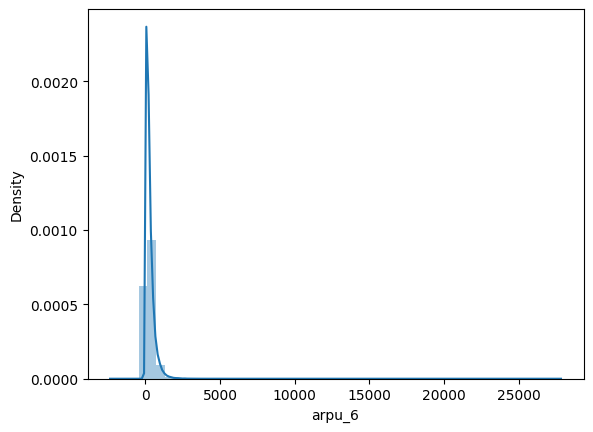

In [91]:
univariate(InputData.arpu_6)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


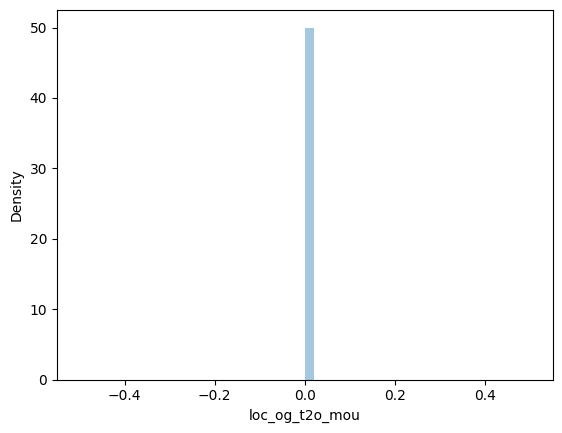

In [92]:
univariate(InputData.loc_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


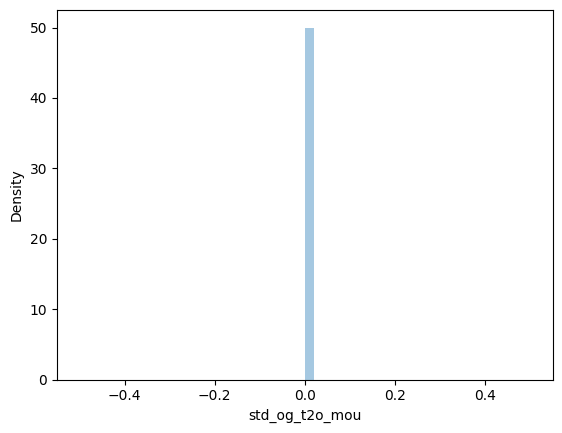

In [93]:
univariate(InputData.std_og_t2o_mou)

count    69999.000000
mean       118.901290
std        309.339595
min       -929.882632
25%          4.110000
50%         27.840000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


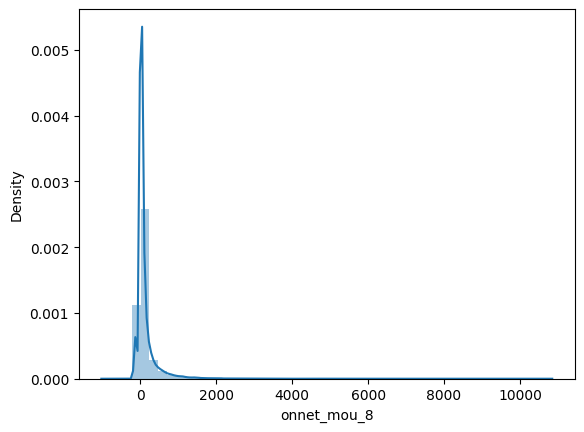

In [94]:
univariate(InputData.onnet_mou_8)

count    69999.000000
mean       194.264520
std        315.549296
min        -50.060372
25%         34.390000
50%        101.680000
75%        216.410000
max      14007.340000
Name: offnet_mou_8, dtype: float64


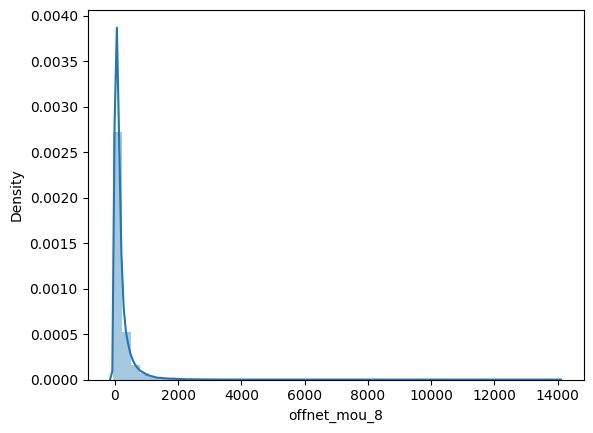

In [95]:
univariate(InputData.offnet_mou_8)

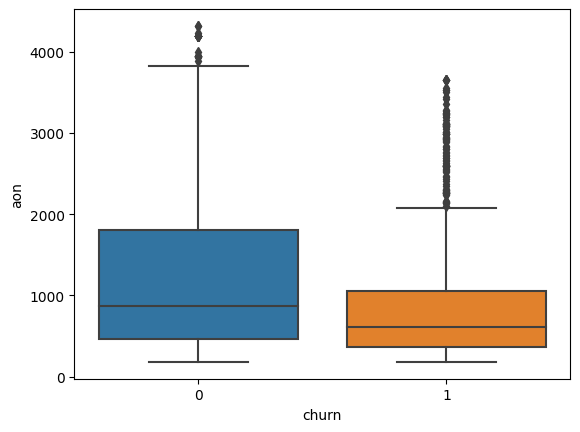

In [96]:
bivariate(churn_filtered.churn, churn_filtered.aon)

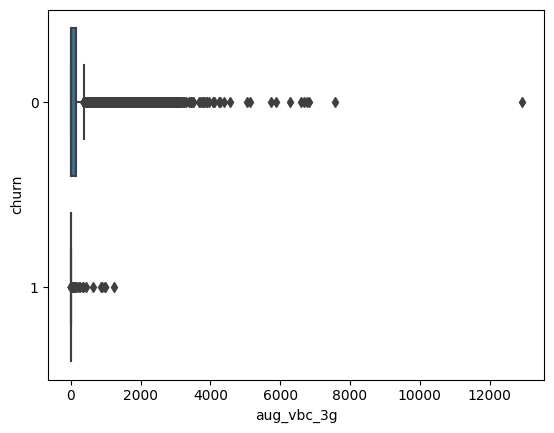

In [97]:
bivariate(churn_filtered.aug_vbc_3g, churn_filtered.churn)

In [98]:
pd.crosstab(churn_filtered.churn, churn_filtered.night_pck_user_7, normalize='columns')*100

night_pck_user_7,-1.0,0.0,1.0
churn,,,
0,91.32395,97.200515,98.175182
1,8.67605,2.799485,1.824818


In [99]:
churn_filtered.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 125 columns):
 #    Column                 Dtype   
---   ------                 -----   
 0    loc_og_t2o_mou         float64 
 1    std_og_t2o_mou         float64 
 2    loc_ic_t2o_mou         float64 
 3    arpu_6                 float64 
 4    arpu_7                 float64 
 5    onnet_mou_6            float64 
 6    onnet_mou_7            float64 
 7    offnet_mou_6           float64 
 8    offnet_mou_7           float64 
 9    roam_ic_mou_6          float64 
 10   roam_ic_mou_7          float64 
 11   roam_og_mou_6          float64 
 12   roam_og_mou_7          float64 
 13   loc_og_t2t_mou_6       float64 
 14   loc_og_t2t_mou_7       float64 
 15   loc_og_t2m_mou_6       float64 
 16   loc_og_t2m_mou_7       float64 
 17   loc_og_t2f_mou_6       float64 
 18   loc_og_t2f_mou_7       float64 
 19   loc_og_t2c_mou_6       float64 
 20   loc_og_t2c_mou_7       float64 
 21   loc_og_mou

In [100]:
pd.crosstab(churn_filtered.churn, churn_filtered.sachet_3g_7)

sachet_3g_7,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,31.0,33.0
churn,,,,,,,,,,,,,,,,,,,,,
0,17691,1383,365,151,79,67,49,24,13,11,...,1,1,3,1,3,1,3,2,1,1
1,1062,41,10,1,0,4,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Cap outliers in all numeric variables with k-sigma technique

In [101]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [102]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

In [103]:
# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [104]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

# Modeling

In [105]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [106]:
print(churn_filtered.shape)
print(FinalTest.shape)

(21013, 125)
(30000, 125)


In [107]:
#churn_filtered.churn_probability.value_counts()

In [108]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [109]:
FinalTest['churn'] = pd.to_numeric(FinalTest['churn'])

In [110]:
#Approach 2 Considering the churn_probability column from train
#churn_filtered = churn_filtered.drop("churn" , axis =1)

In [111]:
#FinalTest = FinalTest.drop("churn_probability" , axis = 1)

In [113]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [114]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759, 124)
(15759,)
(5254, 124)
(5254,)


In [115]:
FinalTest = FinalTest.drop("churn", axis = 1)

In [116]:
FinalTest.shape

(30000, 124)

In [117]:
different_columns = set(X_train.columns) - set(FinalTest.columns)

# Print the names of columns present in X_train but not in FinalTest
print("Columns present in X_train but not in FinalTest:")
print(different_columns)

Columns present in X_train but not in FinalTest:
set()


Aggregating the categorical columns

In [118]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()

fb_user_7
-1.0    0.085806
0.0     0.063516
1.0     0.025225
Name: churn, dtype: float64

In [119]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [120]:
FinalTest.replace(mapping, inplace = True)

In [121]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 5224 to 20443
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  15759 non-null  category
 1   night_pck_user_7  15759 non-null  category
 2   fb_user_6         15759 non-null  category
 3   fb_user_7         15759 non-null  category
dtypes: category(4)
memory usage: 185.2 KB


PCA

In [122]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [123]:
print(X_train.shape)
print(FinalTest.shape)

(15759, 124)
(30000, 124)


In [124]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [125]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.07
1       21.04
2       26.88
3       32.07
4       36.15
5       39.94
6       42.90
7       45.79
8       48.23
9       50.52
10      52.67
11      54.77
12      56.71
13      58.58
14      60.34
15      62.03
16      63.54
17      64.98
18      66.37
19      67.72
20      68.95
21      70.13
22      71.27
23      72.35
24      73.41
25      74.43
26      75.42
27      76.38
28      77.28
29      78.15
30      79.00
31      79.84
32      80.63
33      81.41
34      82.16
35      82.86
36      83.56
37      84.24
38      84.92
39      85.58
40      86.22
41      86.84
42      87.44
43      88.02
44      88.53
45      89.02
46      89.51
47      89.98
48      90.43
49      90.88
50      91.30
51      91.72
52      92.13
53      92.52
54      92.90
55      93.26
56      93.62
57      93.95
58      94.27
59      94.58
60      94.88
61      95.16
62      95.43
63      95.67
64      95.92
65      96.15
66      96.36
67      96.58
68      96.79
69      96.99
70      97.19
71    

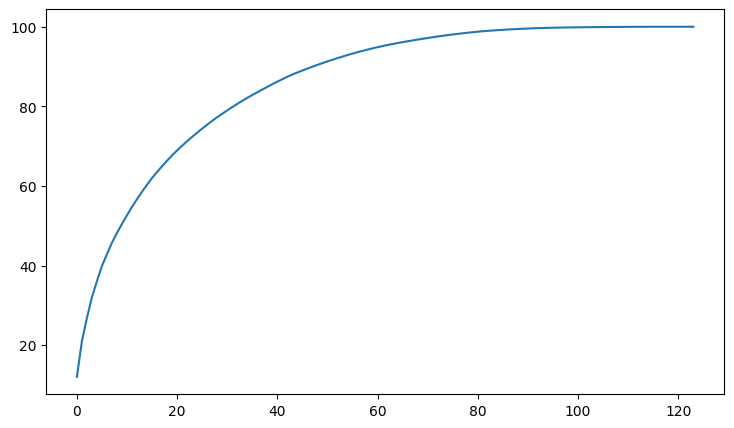

In [126]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

~ 60 components explain 90% variance

~ 80 components explain 95% variance

# PCA and Logistic Regression

In [127]:
# create pipeline
PCA_VARS = 70
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [128]:
# fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=70)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [129]:
# check score on train data
pipeline.score(X_train, y_train)

0.9701757725744019

Evaluate on test data

In [130]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4826  148]
 [   5  275]]
Sensitivity: 	0.98
Specificity: 	0.97
AUC:    	 1.0
[[4826  148]
 [   5  275]]
Sensitivity: 	0.98
Specificity: 	0.97
AUC:    	 1.0


Hyperparameter tuning - PCA and Logistic Regression

In [132]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60,65,70,75, 80], 'logistic__C': [0.1,0.2,0.3,0.4, 0.5,0.8, 1,1.5, 2,2.5, 3,3.5, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [133]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.5,
                                         2, 2.5, 3, 3.5, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 65, 70, 75, 80]},
             scoring='roc_auc', verbose=1)

In [134]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.734656,0.042460,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
1,0.623279,0.051283,0.000000,0.000000,0.1,l1,65,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 65}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
2,0.647928,0.050659,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 70}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
3,0.679619,0.009189,0.000000,0.000000,0.1,l1,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 75}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
4,0.777073,0.062319,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
5,0.752075,0.047376,0.036057,0.014847,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 60}",0.995627,0.992593,0.991827,0.994502,0.994441,0.993798,0.001385,74
6,0.915893,0.268395,0.032257,0.009191,0.1,l2,65,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 65}",0.995590,0.992621,0.991845,0.994347,0.994291,0.993739,0.001337,75
7,1.546938,0.158283,0.045505,0.008947,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 70}",0.995699,0.992645,0.992366,0.994586,0.994171,0.993894,0.001242,73
8,1.562132,0.082340,0.039053,0.009216,0.1,l2,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 75}",0.995570,0.992813,0.992873,0.995051,0.994179,0.994097,0.001117,71
9,1.128510,0.341614,0.025224,0.005163,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}",0.995612,0.992941,0.992982,0.994608,0.994501,0.994129,0.001029,67


In [135]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9946935573605981
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [136]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))



[[4844  130]
 [   8  272]]
Sensitivity: 	0.97
Specificity: 	0.97
AUC:    	 1.0


In [137]:
print(X_test.shape)
print(FinalTest.shape)

(5254, 124)
(30000, 124)


# Creating submission file

In [138]:
sample = pd.read_csv("/content/sample.csv")
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [139]:
FinalTest_Original.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [140]:
Submission_df = sample
Submission_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [141]:
# convert imputed numpy array to pandas dataframe
print(FinalTest.isnull().sum()*100/FinalTest.shape[0])

loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou_7         0.0
std_og_t2f_mou_6         0.0
std_og_t2f_mou_7         0.0
std_og_t2c_mou_6         0.0
std_og_t2c_mou_7         0.0
std_og_mou_6             0.0
std_og_mou_7             0.0
isd_og_mou_6             0.0
isd_og_mou_7  

In [142]:
#Lets predict for FinalTest
# predict churn on test data
final_pred = model.predict(FinalTest)

In [143]:
Submission_df['churn_probability'] = final_pred
Submission_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [144]:
Submission_df.to_csv('submission_pca_C54_V2.csv',index=False)

In [145]:
sample.churn_probability.value_counts()

0    27081
1     2919
Name: churn_probability, dtype: int64

In [146]:
Submission_df.churn_probability.value_counts()

0    27081
1     2919
Name: churn_probability, dtype: int64

## Random Forest

In [147]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [148]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [149]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4960   14]
 [  55  225]]
Sensitivity: 	0.8
Specificity: 	1.0
AUC:    	 1.0


# Choosing best features

In [150]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [151]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [152]:
# OOB score
rf_model.oob_score_

0.9845802398629354

In [153]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4963   11]
 [  58  222]]
Sensitivity: 	0.79
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [154]:
final_pred_rf = rf_model.predict(FinalTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [155]:
Submission_df['churn_probability'] = final_pred_rf
Submission_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [156]:
Submission_df.to_csv('submission_pca_C54_random_forest_V2.csv',index=False)

# Feature Importance

In [157]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,arpu_diff,9.085470
1,isd_og_mou_diff,7.803030
2,spl_ic_mou_diff,7.780453
3,total_rech_amt_diff,6.187541
4,max_rech_amt_diff,5.815237
5,roam_ic_mou_7,4.891948
6,roam_ic_mou_diff,4.460572
7,onnet_mou_diff,4.299963
8,total_ic_mou_diff,3.581777
9,roam_og_mou_7,3.569666


# Extracting top 30 features

In [158]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<Axes: >

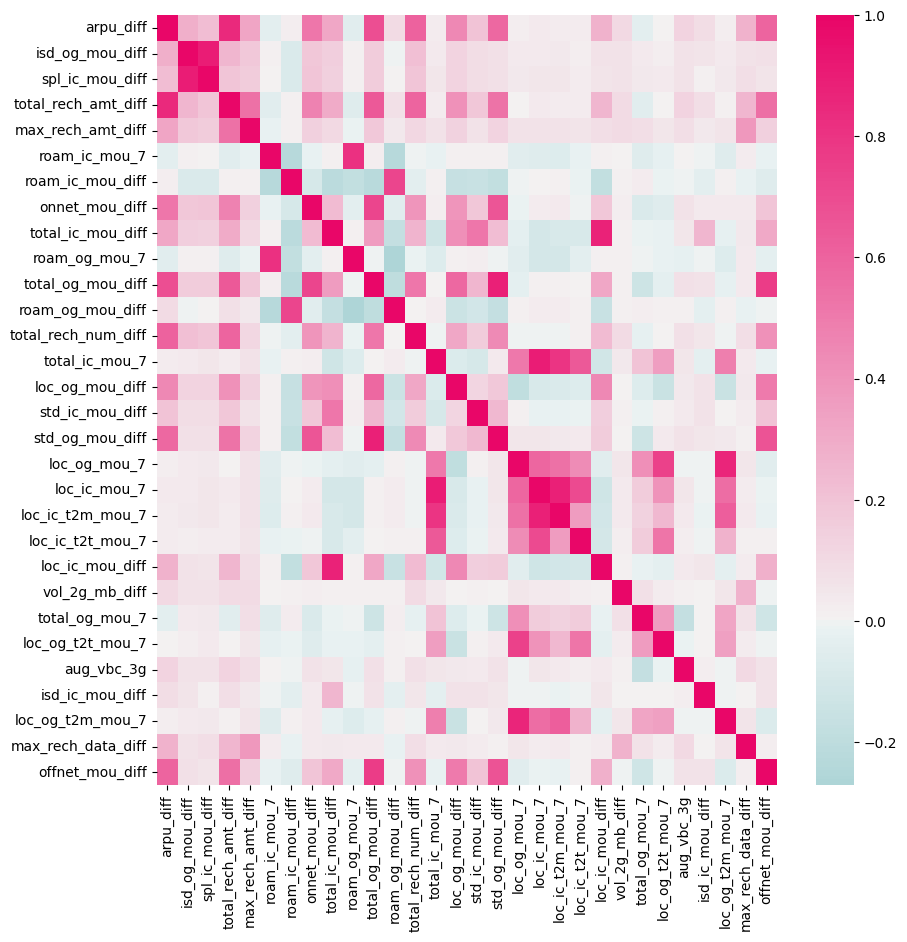

In [159]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [160]:
top_features = ['total_ic_mou_7', 'total_rech_amt_diff', 'total_og_mou_7', 'arpu_7', 'roam_ic_mou_7', 'roam_og_mou_7',
                'std_ic_mou_7', 'av_rech_amt_data_7', 'std_og_mou_7']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [161]:
# logistic regression
steps = [('scaler', StandardScaler()),
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [162]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [163]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9459848832359496
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}


In [164]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4641  333]
 [  47  233]]
Sensitivity: 	0.83
Specificity: 	0.93
ROC:    	 0.95


Extract the intercept and the coefficients from the logistic model

In [165]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [166]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [167]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [168]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_7,total_rech_amt_diff,total_og_mou_7,arpu_7,roam_ic_mou_7,roam_og_mou_7,std_ic_mou_7,av_rech_amt_data_7,std_og_mou_7
0,-3.236704,-0.823253,-2.346068,-1.543927,-0.92026,-0.021332,0.542398,0.224306,-0.449948,0.946653
